In [ ]:
#task 2

student = {
    "name": "fatima",
    "age": 22,
    "roll_number": "sp23-bcs-055",
    "grade": "A"
}

print("Student information:")
for key, value in student.items():
  print(f"{key}: {value}")

student["grade"] = "B"
print(student)

student["email"] = "fatima@gmail.com"
print(student)

del student["roll_number"]
print(student)


Student information:
name: fatima
age: 22
roll_number: sp23-bcs-055
grade: A
{'name': 'fatima', 'age': 22, 'roll_number': 'sp23-bcs-055', 'grade': 'B'}
{'name': 'fatima', 'age': 22, 'roll_number': 'sp23-bcs-055', 'grade': 'B', 'email': 'fatima@gmail.com'}
{'name': 'fatima', 'age': 22, 'grade': 'B', 'email': 'fatima@gmail.com'}


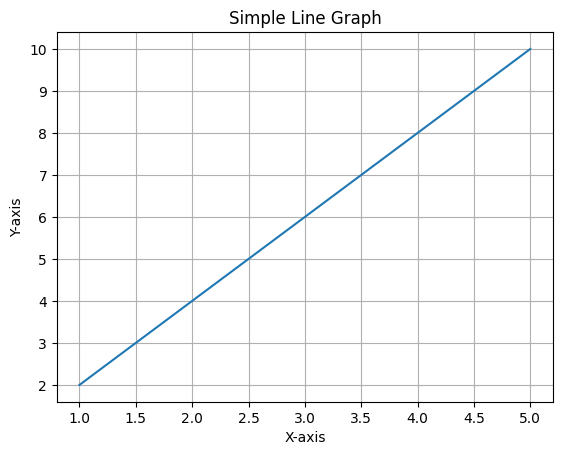

In [ ]:
#task 3
import matplotlib.pyplot as plt

X = [1, 2, 3, 4, 5]
Y = [2, 4, 6, 8, 10]

plt.plot(X,Y)

plt.title("Simple Line Graph")

plt.xlabel("X-axis")

plt.ylabel("Y-axis")

plt.grid(True)

plt.show()


In [ ]:
from os import stat_result
import time
import psutil
from collections import deque

def memory_usage():
  return psutil.Process().memory_info().rss / 1024 ** 2

jug1_capacity = 4
jug2_capacity = 3
goal = 2

def is_goal(state):
  return goal in state

def get_next_states(state):
    x, y = state
    states = []

    # Fill Jug1
    states.append((jug1_capacity, y))
    # Fill Jug2
    states.append((x, jug2_capacity))
    # Empty Jug1
    states.append((0, y))
    # Empty Jug2
    states.append((x, 0))
    # Pour Jug1 → Jug2
    pour = min(x, jug2_capacity - y)
    states.append((x - pour, y + pour))
    # Pour Jug2 → Jug1
    pour = min(y, jug1_capacity - x)
    states.append((x + pour, y - pour))

    return states




In [ ]:
def bfs(start):
    visited = set()
    queue = deque([(start, [start])])

    while queue:
        (state, path) = queue.popleft()
        if is_goal(state):
            return path
        visited.add(state)
        for next_state in get_next_states(state):
            if next_state not in visited:
                queue.append((next_state, path + [next_state]))
    return None


In [ ]:
def dfs(start):
  visited = set()
  stack = [(start, [start])]

  while stack:
    (state, path) = stack.pop()
    if is_goal(state):
      return path
    visited.add(state)
    for next_state in get_next_states(state):
      if next_state not in visited:
        stack.append((next_state, path+[next_state]))
  return None

In [ ]:
start_state = (0,0)

start_time = time.time()
bfs_memory_before = memory_usage()
bfs_path = bfs(start_state)
bfs_memory_after = memory_usage()
bfs_time = time.time() - start_time

In [ ]:
start_time = time.time()
dfs_memory_before = memory_usage()
dfs_path = dfs(start_state)
dfs_memory_after = memory_usage()
dfs_time = time.time() - start_time

In [ ]:
print("BFS Path:", bfs_path)
print("DFS Path:", dfs_path)
print()
print("BFS Steps:", len(bfs_path))
print("DFS Steps:", len(dfs_path))
print()
print("BFS Time Taken: {:.6f} sec".format(bfs_time))
print("DFS Time Taken: {:.6f} sec".format(dfs_time))
print()
print("BFS Memory Used: {:.4f} MB".format(bfs_memory_after - bfs_memory_before))
print("DFS Memory Used: {:.4f} MB".format(dfs_memory_after - dfs_memory_before))


BFS Path: [(0, 0), (0, 3), (3, 0), (3, 3), (4, 2)]
DFS Path: [(0, 0), (0, 3), (3, 0), (3, 3), (4, 2)]

BFS Steps: 5
DFS Steps: 5

BFS Time Taken: 0.001327 sec
DFS Time Taken: 0.001402 sec

BFS Memory Used: 0.0000 MB
DFS Memory Used: 0.0000 MB


In [ ]:
#task 6
import heapq

# Maze grid (0 = open, 1 = wall)
maze = [
    [1,0,1,0,0,0],
    [0,0,0,0,1,0],
    [0,0,1,0,0,0],
    [0,0,0,1,0,0],
    [0,0,0,0,0,1],
    [0,0,0,0,0,0]
]

start = (0, 0)  # A
goal = (5, 5)   # Y
rows, cols = len(maze), len(maze[0])

def heuristic(a, b):
    # Manhattan distance
    return abs(a[0] - b[0]) + abs(a[1] - b[1])

def neighbors(node):
    x, y = node
    directions = [(1,0), (-1,0), (0,1), (0,-1)]
    for dx, dy in directions:
        nx, ny = x + dx, y + dy
        if 0 <= nx < rows and 0 <= ny < cols and maze[nx][ny] == 0:
            yield (nx, ny)

def astar(start, goal):
    open_set = []
    heapq.heappush(open_set, (0 + heuristic(start, goal), 0, start))
    came_from = {}
    g_score = {start: 0}

    while open_set:
        _, cost, current = heapq.heappop(open_set)
        if current == goal:
            path = []
            while current in came_from:
                path.append(current)
                current = came_from[current]
            path.append(start)
            return path[::-1]

        for neighbor in neighbors(current):
            new_cost = g_score[current] + 1
            if neighbor not in g_score or new_cost < g_score[neighbor]:
                g_score[neighbor] = new_cost
                priority = new_cost + heuristic(neighbor, goal)
                heapq.heappush(open_set, (priority, new_cost, neighbor))
                came_from[neighbor] = current

    return None

path = astar(start, goal)
print("Path:", path)


Path: [(0, 0), (0, 1), (1, 1), (1, 2), (1, 3), (2, 3), (2, 4), (3, 4), (4, 4), (5, 4), (5, 5)]
